In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from nested_lookup import nested_delete
from src import functions as fcn

In [2]:
lambdas = [
    -0.366875964264129 + 0.520259438865201*1j, #3/14
    0.595743941976559 + 0.254425889416369*1j, #3/8
    0.05277415108645189611947896053229129518349675421389 + 0.68814740940655613016868820363694147172435466851358j, #corner point
    0.636009824757034 + 0.106924311121288j, #7/16
    0.371858680074136 + 0.519411153747943j #CKW
]

In [3]:
from sympy import *
x=Symbol('x')
poly = Function('poly')(x)
poly = simplify(1+x+x**2-2*x**3)
allroots = solveset(poly)
allroots.n(30)

{1.23375192852825878819094337768, -0.36687596426412939409547168884 - 0.52025943886520082893072352894*I, -0.36687596426412939409547168884 + 0.52025943886520082893072352894*I}

In [5]:
neighborgraph = fcn.nbhG(lambdas[0],6)
neighborgraph

2023-06-04 14:09:28,953 - src.functions - DEBUG : depth=0 newVertices={'h1': -1.81053571376613553489676178287 - 2.56748434413988668723050068365*I}
2023-06-04 14:09:28,955 - src.functions - DEBUG : keyNb='h1' and valNb=-1.81053571376613553489676178287 - 2.56748434413988668723050068365*I
2023-06-04 14:09:28,960 - src.functions - DEBUG : hStar=-1.65696814329038711568569256233 + 4.6485220996006881063407562464*I
2023-06-04 14:09:28,962 - src.functions - DEBUG : hPM=0.153567570475748419211069220544 + 7.21600644374057479357125693006*I
2023-06-04 14:09:28,965 - src.functions - DEBUG : hMP=-3.46750385705652265058245434521 + 2.08103775546080141911025556275*I
2023-06-04 14:09:29,013 - src.functions - DEBUG : phiStar is POSSIBLY a new vertex
2023-06-04 14:09:29,015 - src.functions - DEBUG : phiStar is NOT a new vertex
2023-06-04 14:09:29,017 - src.functions - DEBUG : phiPM is POSSIBLY a new vertex
2023-06-04 14:09:29,019 - src.functions - DEBUG : phiMP is POSSIBLY a new vertex
2023-06-04 14:09:29,

{}

In [8]:
neighborgraph = fcn.nbhG(lambdas[0],6)
neighborgraph

2022-10-17 09:12:52,040 - src.functions - DEBUG : depth=0 newVertices={'h1': -1.81053571376614 - 2.56748434413989*I}
2022-10-17 09:12:52,043 - src.functions - DEBUG : keyNb='h1' and valNb=-1.81053571376614 - 2.56748434413989*I
2022-10-17 09:12:52,048 - src.functions - DEBUG : hStar=-1.65696814329039 + 4.64852209960069*I
2022-10-17 09:12:52,050 - src.functions - DEBUG : hPM=0.153567570475748 + 7.21600644374058*I
2022-10-17 09:12:52,053 - src.functions - DEBUG : hMP=-3.46750385705652 + 2.0810377554608*I
2022-10-17 09:12:52,071 - src.functions - DEBUG : phiStar is POSSIBLY a new vertex
2022-10-17 09:12:52,073 - src.functions - DEBUG : phiStar IS a child vertex
2022-10-17 09:12:52,074 - src.functions - DEBUG : keyNb='h1' is NOT in edges
2022-10-17 09:12:52,075 - src.functions - DEBUG : phiPM is POSSIBLY a new vertex
2022-10-17 09:12:52,077 - src.functions - DEBUG : phiMP is POSSIBLY a new vertex
2022-10-17 09:12:52,080 - src.functions - DEBUG : phiMP IS a child vertex
2022-10-17 09:12:52,0

{'id': {'h1': {'label': '- +', 'weight': 0.25}},
 'h1': {'h3': {'label': '- +', 'weight': 0.25}},
 'h3': {'h4': {'label': '- +', 'weight': 0.25}},
 'h4': {'h5': {'label': '+ -', 'weight': 0.75}},
 'h5': {'h7': {'label': '- +', 'weight': 0.25}},
 'h7': {}}

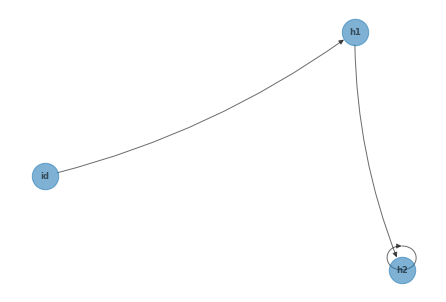

In [4]:
newG =nx.DiGraph(neighborgraph)

# for k,v in neighborgraph.items():
#     if len(v)==0:
#         neighborgraph = nested_delete(neighborgraph,k)
        
newG =nx.DiGraph(neighborgraph)

# deadnodes = [node for node,degree in dict(newG.out_degree()).items() if degree == 0]
# newG.remove_nodes_from(deadnodes)

options = {
#     'width':1.0,
#     'node_color':'white',
    'alpha':0.572,
#     'edge_color':'white',
    'node_size':700,
    "connectionstyle":'arc3, rad = 0.1',
    'with_labels':True,
    'font_size':'small',
    'font_color':'black',
    'font_weight':'bold'
}

pos = nx.spectral_layout(newG)
nx.draw(newG,pos,**options)

### Debugging

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numba import njit
from nested_lookup import nested_delete
from sympy import Symbol, Function, evalf, Abs

In [35]:
class Disk:
    __slots__= 'center', 'radius', 'word', 'ref'
    def __init__(self,center:complex,rad:float,word:str='',ref:complex=None):
        """
        Parameters
        ----------
        center: complex
            The center of the Ball as a complex number
        radius: float
            The radius of the Ball as a real number
        word: str
            The sequence of + and - representing the Ball
        next_level: complex
            The power of the next level
        """
        self.center = center
        self.radius = rad
        self.word = word
        self.ref = 1.+0.j if (ref is None) else ref
    
    def __repr__(self):
        return f"Disk: \n\tword: {self.word}\n\tcenter: {self.center} \n\tradius:{self.radius}\n\t\tref:{self.ref}"
  
    def is_disjoint(self,disk:Disk):
        """
        checks whether this Disk is disjoint from another Disk
        
        Parameters
        ----------
        disk: Disk
            the other Disk
        
        Returns
        -------
        bool
        """
        return np.abs(self.center-disk.center) > (self.radius + disk.radius)
  
    def image_under(self,fcn:str, curr_c:complex):
        """
        computes the image of this Disk under the given function
        
        Parameters
        ----------
        function_name: str
            the character representing the function
        current_c: complex
            the current parameter value
            
        Returns
        -------
        Ball
        """
        new_center = (self.center-self.ref) if (fcn == 'g') else (self.center+self.ref)
        new_rad = np.abs(curr_c) * self.radius
        new_ref = curr_c*self.ref
        new_word = self.word + fcn
        return Disk(new_center, new_rad, new_word, new_ref)
  
    def does_not_contain(self,pnt):
        """
        checks whether the give point is not contained in the disk
        
        Parameters
        ----------
        function_name: str
            the character representing the function
        current_c: complex
            the current parameter value
            
        Returns
        -------
        Ball
        """
        return (np.abs(pnt-self.center) > self.radius)

In [70]:
def disconnected_general(curr_c:complex,depth:int):
    # adjusted from https://www.aldenwalker.org/schottky.html
    initial_ball = Disk(0.+0.j, 1/(1-np.abs(curr_c)));
    stack = np.array([[initial_ball.image_under('f',curr_c),
                       initial_ball.image_under('g',curr_c)]])
    steps = 0;
    while (len(stack) > 0 ) :
        print(f"STEP:{steps} \n{len(stack)=}\ncurrent state of stack \n{[stack]}\n")
        
        pair_of_disks,stack = stack[-1], stack[:-1]
        
        print(f"\t---Checking pair of disks {[d.word for d in pair_of_disks]}")
        
        if (pair_of_disks[0].is_disjoint(pair_of_disks[1])): 
            print(f"\t---disjoint disks: continue\n")
            continue

        if (len(pair_of_disks[0].word) == depth): 
            print(f"\t---reached depth: returning {steps=}  \n\t{len(stack)=} state of stack \n{[stack]}\n")
            return steps
        
        print(f"\t---intersecting: calculate images and append them to the stack\n")
        ff = pair_of_disks[0].image_under('f',curr_c)
        fg = pair_of_disks[0].image_under('g',curr_c)
        gf = pair_of_disks[1].image_under('f',curr_c)
        gg = pair_of_disks[1].image_under('g',curr_c)
        #there are 4 children: [ff,gg],[ff,gf],[fg,gg],[fg,gf],but
        #[fg,gg] and [ff,gf] have the same displacement, so forget [ff,gf]
        stack = np.append(stack,[[ff,gg]],axis=0)
        stack = np.append(stack,[[fg,gg]],axis=0)
        stack = np.append(stack,[[fg,gf]],axis=0)
        steps += 1 
    return 0;

In [204]:
lambdas = [
    0.366875964264129394095471688839696517595563618765593247116005 + 0.520259438865200828930723528940227115174924275956965606630538*1j, #3/14
    0.595743941976559373530677134113758646737345510937144045504891 + 0.254425889416368995243211219643495532619603711040766445706284*1j #3/8
]

In [205]:
disconnected_general(lambdas[0],3)

NameError: name 'disconnected_general' is not defined

## New Idea

The stack will be a `set` where each element is an object with the following properties:

- `word`: the itinerary of this element
- `val` : the approximate value of this element
- `parents` : the list of itineraries of elements from which this element comes from
- `children` : the list of itineraries of elements generated from this element
- `edges` : a list of str representing which function has been used to obtain this element's children

In [4]:
class Neighbor:
    __slots__ = 'word','parents','children','val','edges','_hash'
    def __init__(self,word:str,val:complex,*,parents:list=None,children:list=None,edges:list=None,):
        self.word = word
        self.val = complex(val)
        self.parents = parents if parents else []
        self.children = children if children else []
        self.edges = edges if edges else []
        self._hash = hash(complex(round(self.val.real,13),round(self.val.imag,13)))
    def __repr__(self)->str:
        return f"\n\titinerary: {self.word}\n\tvalue: {self.val}\n\tparents: {self.parents}\n\tchildren: {self.children}\n\tedges: {self.edges}\n\thash: {self._hash}\n"
    def __hash__(self)->int:
        return self._hash
    def __eq__(self,other)->bool:
        if not isinstance(other, type(self)): return NotImplemented
        return Abs(self.val-other.val)<=1e-13
    def set_parent(self,elem:str)->None:
        self.parents.append(elem)
    def set_child(self,elem:str,edge:str)->None:
        self.children.append(elem)
        self.edges.append(edge)
    def filter_children(self,child_to_filter:str):
        print(f" :::: children of {self.word} are {self.children}")
        self.children=[child for child in self.children if child != child_to_filter]
        print(f" :::: updated children of {self.word} are {self.children}")
        return self

In [5]:
def is_child_neighbor(test_nbh:Neighbor, valid_nbhs:set, param:complex):
    """
    Checks whether the neighbor is a child neighbor.
    
    Parameters
    ----------
    test_nbh: Neighbor
        the Neighbor to be tested
    valid_nbhs: set
        the set of valid neighbors
    param: complex
        the parameter
    
    Returns
    -------
    tuple of bool
    (is_new, is_child)
        (True, True) test_nbh is a new child neighbor
        (True, False) test_nbh is not a neighbor
        (False, True) test_nbh matches a neighbor in the set
    """
    
    err = 1e-29
    prec = 30
    
    critical_rad = (2*(1-Abs(param))**(-1)).evalf(prec) #the escape radius
    is_new = test_nbh not in valid_nbhs
    print("=========================================")
    print(f"|> {test_nbh.val=}")
    for elem in valid_nbhs:
        diff = Abs(test_nbh.val-elem.val)
        print(f"|> |test_nbh.val - {elem.val}| = {diff}<=1e-12 {diff<=1e-12}")
        if diff<1e-12: print(f"|>>> hash: {elem._hash}")
    print("=========================================")
    
    if is_new: # test_nbh is POSSIBLY a new vertex
        print(f"\t {test_nbh.word} is POSSIBLY a new neighbor")
        h_val = Abs(test_nbh.val)
        if h_val.evalf(prec)<=critical_rad or Abs(h_val-critical_rad).evalf(prec)<=err:
            print(f"\t\t {test_nbh.word} IS a child vertex\n\n")
            is_child = True # test_nbh IS a child vertex
        else: # phi_Star is NOT a VALID neighbor 
            print(f"\t\t {test_nbh.word} is NOT a new neighbor:\n\t\t {h_val=} {critical_rad=}\n\n")
            is_child = False
    else: # phi_Star ALREADY EXISTS
        print(f"\t {test_nbh.word} ALREADY EXISTS\n\n")
        is_child = True
    return (is_new,is_child)

def add_new_child(child_nbh:Neighbor, parent_nbh:Neighbor, edge:str, children:set, valid_nbhs:set, nbh_lookup:dict):
    """Updates the set of child neighbors, the neighbor set and the dictionary of valid neighbors.
    
    Parameters
    ----------
    child_nbh: Neighbor
        the child Neighbor 
    parent_nbh: Neighbor
        the parent Neighbor 
    edge: str
        the function used to obtain child_nbh from parent_nbh
    valid_nbhs: set
        the set of valid neighbors
    children: list
        the set of valid neighbors
    nbh_lookup: int
        the dictionary of current neighbors
    """
    print(f"\t\t\t>>adding {child_nbh.word} to children set")
    children.add(child_nbh)
    print(f"\t\t\t{children=}\n")
    valid_nbhs.add(child_nbh)
    update_lookup(child_nbh,parent_nbh,edge,valid_nbhs,nbh_lookup,True)

def update_lookup(child_nbh:Neighbor, parent_nbh:Neighbor, edge:str, valid_nbhs:set, nbh_lookup:dict, is_new:bool):
    """Updates the dictionary of valid neighbors and sets the relation between child and parent neighbor.
    
    Parameters
    ----------
    child_nbh: Neighbor
        the child Neighbor 
    parent_nbh: Neighbor
        the parent Neighbor 
    edge: str
        the function used to obtain child_nbh from parent_nbh
    valid_nbhs: set
        the set of valid neighbors
    nbh_lookup: int
        the dictionary of current neighbors
    is_new: bool
        whether child_nbh is a new valid neighbor
    """ 
    if is_new:
        child_nbh_word = child_nbh.word
        print(f"\t\t\t>>new neighbor {child_nbh_word}... updating lookup")
        nbh_lookup.update({child_nbh._hash:child_nbh_word})
    else:
        child_nbh_word = nbh_lookup[child_nbh._hash]
        print(f"\t\t\t>>existing neighbor {child_nbh_word}")
    valid_nbhs.remove(parent_nbh)
    print(f"\t\t\t>>updating children of {parent_nbh.word} with {child_nbh_word}")
    parent_nbh.set_child(child_nbh_word,edge)
    print(f"{parent_nbh}")
    valid_nbhs.add(parent_nbh)

def check_neighbor(test_nbh,curr_nbh,edge,valid_nbhs,children,nbh_lookup,param)->bool:
    is_new, is_child = is_child_neighbor(test_nbh,valid_nbhs,param)
    print(f"\t\t\t>>> {test_nbh.word} {'is new' if is_new else 'is NOT new'} and {'is child' if is_child else 'is NOT child'}\n")
    if is_new and is_child:
        print("\t\t\t>>> therefore adding it as a new child")
        add_new_child(test_nbh,curr_nbh,edge,children,valid_nbhs,nbh_lookup) 
    elif not is_new: 
        print("\t\t\t>>> therefore looking it up")
        update_lookup(test_nbh,curr_nbh,edge,valid_nbhs,nbh_lookup,False)
    else:
        print("\t\t\t>>> therefore doing nothing")
    return is_child

In [6]:
def nbhG(param,max_depth):
    """
    finds the edges in the neighbor graph for
    the parameter z.

    Parameters
    ----------
    param: complex number
        the parameter to check
    
    Attributes
    ----------
    maxDepth: int
        maximum depth
    
    Returns
    -------
    edges: dict
        the edges of the graph
    """
    z=Symbol('z')
    phi_PM = Function('phiPM')(z)
    phi_MP = Function('phiMP')(z)
    phi_Star = Function('phiStar')(z)
    
    phi_PM = (z-2)*param**(-1)# corresponds to fp^(-1) g fm
    phi_MP = (z+2)*param**(-1)# corresponds to fm^(-1) g fp
    phi_Star = z*param**(-1)# corresponds to fpm^(-1) g fpm
        
    err = 1e-14
    prec = 30
    
    #initialize the set of neighbors in the graph
    valid_neighbors = set([
        Neighbor('.',0.+0.j,children=['+'],edges=['mp']),
        Neighbor('+',phi_MP.evalf(prec,subs={z:0}),parents=['.'])
    ])
    
    #initialize the dictionary of current neighbors 
    nbh_lookup = {elem._hash:elem.word for elem in valid_neighbors}
    
    #initialize the set of new neighbors at the current stage
    new_neighbors = set([Neighbor('+',phi_MP.evalf(prec,subs={z:0}),parents=['.'])])
    
    
    depth = 1
    
    critical_rad = (2*(1-Abs(param))**(-1)).evalf(prec) #the escape radius
    
    
    while len(new_neighbors) and depth<max_depth:
        new_children = set()
        nbh_without_child = []
        
        #boolean values to check the existence of children of a vertex
        is_child_Star = False
        is_child_PM = False
        is_child_MP = False
        
        print(f"{depth=} {new_neighbors=}")
        # ----------------------------- for each nbh in new_neighbors --------------------------------------------
        for current_nbh in new_neighbors:
            current_word = current_nbh.word
            current_val = current_nbh.val
            print(f"[->] Word: '{current_word}' and Value: {current_val}")
            
            #compute the possible new neighbors
            h_Star = Neighbor(current_word+'0',phi_Star.evalf(prec,subs={z:current_val}),parents=[current_word])
            h_PM = Neighbor(current_word+'-',phi_PM.evalf(prec,subs={z:current_val}),parents=[current_word])
            h_MP = Neighbor(current_word+'+',phi_MP.evalf(prec,subs={z:current_val}),parents=[current_word])
            
            print(f"\t{h_Star=}")
            print(f"\t{h_PM=}")
            print(f"\t{h_MP=}")

            is_child_Star = check_neighbor(h_Star,current_nbh,'*',valid_neighbors,new_children,nbh_lookup,param)
            is_child_PM = check_neighbor(h_PM,current_nbh,'pm',valid_neighbors,new_children,nbh_lookup,param)
            is_child_MP = check_neighbor(h_MP,current_nbh,'mp',valid_neighbors,new_children,nbh_lookup,param)
                
            #in the case that all the computed neighbors are not valid
            #save the current neighbor in a list 
            if not is_child_Star and not is_child_PM and not is_child_MP:
                print(f"\t{is_child_Star=}, {is_child_PM=}, {is_child_MP=}")
                print(f"\n\t>there are no new vertices. saving '{current_word}' in nbh_without_child")
                nbh_without_child.append(current_nbh)
            
        #------------------------------------- end for loop ----------------------------------------------------
        
        #if there are neighbors without children
        #remove them from the set of valid neighbors
        #and update the lookup dictionary
        if len(nbh_without_child)!=0:
            for elem in nbh_without_child:
                print(f"\t>removing {elem.word} from new_neighbors and valid neighbors")
                valid_neighbors.remove(elem)
                print(f"\t...... removed {elem.word} from valid_neighbors \n {valid_neighbors=}")
                valid_neighbors = {nbh.filter_children(elem.word) for nbh in valid_neighbors}
                print(f"\t...... removed {elem.word} from neighbors' children \n {valid_neighbors=}")
                del nbh_lookup[elem._hash]
                print(f"\t...... removed {elem.word} from nbh_lookup\n")
        
                
        #update the list of new vertices with the newly found vertices
        print(f" \n__________\n{new_neighbors=}\n{new_children=}\n__________")
        new_neighbors.clear()
        new_neighbors.update(new_children)
        new_children.clear()
        print(f"__________\n{new_neighbors=}\n__________\n\n")
        depth += 1
        
#TODO: need to remove the neighbors with dead children

    #clean up neighbors with no children
    valid_neighbors = {nbh for nbh in valid_neighbors if len(nbh.children)>0}
    
    return valid_neighbors,nbh_lookup


In [7]:
nbhG(lambdas[2],9)

depth=1 new_neighbors={
	itinerary: +
	value: (0.22158559417046056-2.8893605951221124j)
	parents: ['.']
	children: []
	edges: []
	hash: -7013494273389613318
}
[->] Word: '+' and Value: (0.22158559417046056-2.8893605951221124j)
	h_Star=
	itinerary: +0
	value: (-4.149652236550266-0.6402406842428489j)
	parents: ['+']
	children: []
	edges: []
	hash: -6351714558389231876

	h_PM=
	itinerary: +-
	value: (-4.371237830720727+2.2491199108792634j)
	parents: ['+']
	children: []
	edges: []
	hash: 661779714744610946

	h_MP=
	itinerary: ++
	value: (-3.928066642379805-3.5296012793649614j)
	parents: ['+']
	children: []
	edges: []
	hash: -8753523044009149132

|> test_nbh.val=(-4.149652236550266-0.6402406842428489j)
|> |test_nbh.val - 0j| = 4.19875241209414<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 4.91591909476118<=1e-12 False
	 +0 is POSSIBLY a new neighbor
		 +0 IS a child vertex


			>>> +0 is new and is child

			>>> therefore adding it as a new child
			>>adding +

|> |test_nbh.val - (-4.371237830720727+2.2491199108792634j)| = 6.08366654484253<=1e-12 False
|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 6.89187992660822<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 9.83183818952236<=1e-12 False
|> |test_nbh.val - (-1.3846946804410387+5.9239867716593135j)| = 4.91591909476118<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 11.8445965433973<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 12.5741363508150<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 8.95852823449026<=1e-12 False
	 ++- is POSSIBLY a new neighbor
		 ++- is NOT a new neighbor:
		 h_val=9.99652099068500 critical_rad=6.45511266443947118176538424450


			>>> ++- is new and is NOT child

			>>> therefore doing nothing
|> test_nbh.val=(-5.312761322820844+2.394385492294352j)
|> |test_nbh.val - 0j| = 5.82739347898962<=1e-12 False
|> |test_nbh.val - (-4.37123783072

|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 6.08366654484253<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 4.26723338517698<=1e-12 False
|> |test_nbh.val - (-1.3846946804410387+5.9239867716593135j)| = 4.70883712394420<=1e-12 False
|> |test_nbh.val - (4.033614944552711+4.905896098178074j)| = 3.24988904085816<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 13.3335787541314<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 11.1491318738285<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 11.0865735299176<=1e-12 False
	 +++0 is POSSIBLY a new neighbor
		 +++0 is NOT a new neighbor:
		 h_val=8.44344111590064 critical_rad=6.45511266443947118176538424450


			>>> +++0 is new and is NOT child

			>>> therefore doing nothing
|> test_nbh.val=(2.6489202641116707+10.829882869837387j)
|> |test_nbh.val - 0j| = 11.1491318738285<=1e-12 False
|> |test_nbh.val - (-5.31276132282

|> |test_nbh.val - (-5.312761322820844+2.394385492294352j)| = 14.4686487328547<=1e-12 False
|> |test_nbh.val - (-4.371237830720727+2.2491199108792634j)| = 13.6578699847085<=1e-12 False
|> |test_nbh.val - (5.418309624993748-1.0180906734812394j)| = 5.79568971708744<=1e-12 False
|> |test_nbh.val - (4.476786132893632-0.872825092066151j)| = 6.08366654484253<=1e-12 False
|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 12.0831302731188<=1e-12 False
|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 8.95852823449025<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 10.8591584331252<=1e-12 False
|> |test_nbh.val - (-1.3846946804410387+5.9239867716593135j)| = 14.6398694396024<=1e-12 False
|> |test_nbh.val - (4.033614944552711+4.905896098178074j)| = 11.8445965433973<=1e-12 False
|> |test_nbh.val - (3.0920914524525918+5.051161679593163j)| = 12.1673330896851<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 10.320363578394

|> |test_nbh.val - (-5.312761322820844+2.394385492294352j)| = 14.9666928438049<=1e-12 False
|> |test_nbh.val - (-4.371237830720727+2.2491199108792634j)| = 14.0885420939582<=1e-12 False
|> |test_nbh.val - (5.418309624993748-1.0180906734812394j)| = 4.76166251760446<=1e-12 False
|> |test_nbh.val - (4.476786132893632-0.872825092066151j)| = 5.36701984118507<=1e-12 False
|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 12.0349930639943<=1e-12 False
|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 8.00293147979537<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 10.0468534903277<=1e-12 False
|> |test_nbh.val - (4.033614944552711+4.905896098178074j)| = 10.7742253648836<=1e-12 False
|> |test_nbh.val - (3.0920914524525918+5.051161679593163j)| = 11.2491756215653<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 11.5958591149457<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 7.6947748537728

|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 11.5741311658588<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 7.48784523823138<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 12.2338912130647<=1e-12 False
	 ++++0 is POSSIBLY a new neighbor
		 ++++0 is NOT a new neighbor:
		 h_val=8.58115227555822 critical_rad=6.45511266443947118176538424450


			>>> ++++0 is new and is NOT child

			>>> therefore doing nothing
|> test_nbh.val=(7.418309624993749-1.01809067348124j)
|> |test_nbh.val - 0j| = 7.48784523823138<=1e-12 False
|> |test_nbh.val - (-5.312761322820844+2.394385492294352j)| = 13.1804840981003<=1e-12 False
|> |test_nbh.val - (-4.371237830720727+2.2491199108792634j)| = 12.2338912130647<=1e-12 False
|> |test_nbh.val - (5.418309624993748-1.0180906734812394j)| = 2.00000000000000<=1e-12 False
|> |test_nbh.val - (4.476786132893632-0.872825092066151j)| = 2.94510823972918<=1e-12 False
|> |test_nbh.val - (-1.16310908627

|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 9.60710756148614<=1e-12 False
|> |test_nbh.val - (4.033614944552711+4.905896098178074j)| = 10.8493069125900<=1e-12 False
|> |test_nbh.val - (-1.092091452452591-5.051161679593163j)| = 4.56107856992280<=1e-12 False
|> |test_nbh.val - (3.0920914524525918+5.051161679593163j)| = 10.9790482363481<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 7.69477485377280<=1e-12 False
|> |test_nbh.val - (-0.986543150279687-3.6748668607800523j)| = 4.91591909476118<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 4.38340223148325<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 9.20241034630956<=1e-12 False
	 +0+00 is POSSIBLY a new neighbor
		 +0+00 is NOT a new neighbor:
		 h_val=6.82273972467076 critical_rad=6.45511266443947118176538424450


			>>> +0+00 is new and is NOT child

			>>> therefore doing nothing
|> test_nbh.val=(3.163109086270579-3.034626176537203

|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 3.66526725015205<=1e-12 False
	 +-+--0 is POSSIBLY a new neighbor
		 +-+--0 is NOT a new neighbor:
		 h_val=7.48784523823138 critical_rad=6.45511266443947118176538424450


			>>> +-+--0 is new and is NOT child

			>>> therefore doing nothing
|> test_nbh.val=(-7.6398952191642095+3.9074512686033516j)
|> |test_nbh.val - 0j| = 8.58115227555822<=1e-12 False
|> |test_nbh.val - (-5.312761322820844+2.394385492294352j)| = 2.77577380471605<=1e-12 False
|> |test_nbh.val - (-4.371237830720727+2.2491199108792634j)| = 3.66526725015205<=1e-12 False
|> |test_nbh.val - (5.418309624993748-1.0180906734812394j)| = 13.9562773394349<=1e-12 False
|> |test_nbh.val - (4.476786132893632-0.872825092066151j)| = 13.0255521599540<=1e-12 False
|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 6.53533336965939<=1e-12 False
|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 12.0444537245035<=1e-12 False
|> |test_nbh.val - (2.986543

|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 4.56107856992280<=1e-12 False
|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 10.0741492191726<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 8.62957324834644<=1e-12 False
|> |test_nbh.val - (3.163109086270579-3.0346261765372033j)| = 11.2109466172948<=1e-12 False
|> |test_nbh.val - (-1.092091452452591-5.051161679593163j)| = 10.0468534903277<=1e-12 False
|> |test_nbh.val - (-4.0336149445527125-4.905896098178076j)| = 8.95852823449026<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 7.63152066612793<=1e-12 False
|> |test_nbh.val - (-4.255200538723173-2.016535503055963j)| = 6.08366654484253<=1e-12 False
|> |test_nbh.val - (-0.986543150279687-3.6748668607800523j)| = 8.89636069930666<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 8.97516622887675<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 4.785637496

|> |test_nbh.val - (-5.312761322820844+2.394385492294352j)| = 6.27397035776524<=1e-12 False
|> |test_nbh.val - (-4.371237830720727+2.2491199108792634j)| = 6.82273972467076<=1e-12 False
|> |test_nbh.val - (5.418309624993748-1.0180906734812394j)| = 16.0635850512693<=1e-12 False
|> |test_nbh.val - (4.476786132893632-0.872825092066151j)| = 15.2140818683029<=1e-12 False
|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 8.35878595385419<=1e-12 False
|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 13.4970621184788<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 11.6462416611848<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 13.6388774241217<=1e-12 False
|> |test_nbh.val - (-4.0336149445527125-4.905896098178076j)| = 13.5983808523177<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 12.3128360157596<=1e-12 False
|> |test_nbh.val - (-4.255200538723173-2.016535503055963j)| = 10.7742253648

|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 8.58115227555823<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 6.75656805405825<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 9.52262302239279<=1e-12 False
|> |test_nbh.val - (-4.0336149445527125-4.905896098178076j)| = 10.8493069125900<=1e-12 False
|> |test_nbh.val - (1.0920914524525893+5.051161679593168j)| = 4.56107856992280<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 9.46919110206834<=1e-12 False
|> |test_nbh.val - (-4.255200538723173-2.016535503055963j)| = 7.98809579590487<=1e-12 False
|> |test_nbh.val - (-0.986543150279687-3.6748668607800523j)| = 9.89389315783275<=1e-12 False
|> |test_nbh.val - (-5.196724030823291-1.871269921640874j)| = 8.00309173264234<=1e-12 False
|> |test_nbh.val - (3.163109086270579-3.0346261765372033j)| = 11.0964174454171<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 6.60864904163

|> |test_nbh.val - (-4.0336149445527125-4.905896098178076j)| = 9.36780457089090<=1e-12 False
|> |test_nbh.val - (-4.255200538723173-2.016535503055963j)| = 6.53808366578194<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 8.00293147979537<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 5.16787171414989<=1e-12 False
	 +0++-++ is POSSIBLY a new neighbor
		 +0++-++ IS a child vertex


			>>> +0++-++ is new and is child

			>>> therefore adding it as a new child
			>>adding +0++-++ to children set
			children={
	itinerary: +0++-0+
	value: (1.0920914524525893+5.051161679593168j)
	parents: ['+0++-0']
	children: []
	edges: []
	hash: 4439139073965411664
, 
	itinerary: +0++-++
	value: (-3.057560784097676+4.4109209953503195j)
	parents: ['+0++-+']
	children: []
	edges: []
	hash: 5004953312559569161
, 
	itinerary: +0+0--+
	value: (-3.1631090862705813+3.034626176537206j)
	parents: ['+0+0--']
	children: []
	edges: []
	hash: 4882176721435613894
}

|> |test_nbh.val - (3.163109086270579-3.0346261765372033j)| = 4.56107856992280<=1e-12 False
|> |test_nbh.val - (-5.418309624993752+1.0180906734812385j)| = 13.9562773394349<=1e-12 False
|> |test_nbh.val - (5.418309624993748-1.0180906734812394j)| = 3.64470124987908<=1e-12 False
|> |test_nbh.val - (-3.1631090862705813+3.034626176537206j)| = 12.8412359715711<=1e-12 False
|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 11.2109466172948<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 8.89636069930666<=1e-12 False
|> |test_nbh.val - (1.0920914524525893+5.051161679593168j)| = 11.0964174454171<=1e-12 False
|> |test_nbh.val - (-4.255200538723173-2.016535503055963j)| = 12.0444537245035<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 7.48784523823139<=1e-12 False
|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 12.2338912130647<=1e-12 False
	 +0++-0++ is POSSIBLY a new neighbor
		 +0++-0++ is NOT a new neighbor:
	

|> |test_nbh.val - (-4.149652236550266-0.6402406842428489j)| = 11.5993960919625<=1e-12 False
	 +0+0--+- is POSSIBLY a new neighbor
		 +0+0--+- is NOT a new neighbor:
		 h_val=8.67741866470768 critical_rad=6.45511266443947118176538424450


			>>> +0+0--+- is new and is NOT child

			>>> therefore doing nothing
|> test_nbh.val=(4.255200538723177+2.0165355030559664j)
|> |test_nbh.val - 0j| = 4.70883712394421<=1e-12 False
|> |test_nbh.val - (-5.312761322820844+2.394385492294352j)| = 9.57541982360713<=1e-12 False
|> |test_nbh.val - (-4.371237830720727+2.2491199108792634j)| = 8.62957324834644<=1e-12 False
|> |test_nbh.val - (4.476786132893632-0.872825092066151j)| = 2.89784485854373<=1e-12 False
|> |test_nbh.val - (-3.057560784097676+4.4109209953503195j)| = 7.69477485377280<=1e-12 False
|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 7.22924857581284E-15<=1e-12 True
|>>> hash: -443037647470202742
|> |test_nbh.val - (4.033614944552716+4.905896098178079j)| = 2.89784485854372<=1e-1

|> |test_nbh.val - (-3.1631090862705813+3.034626176537206j)| = 11.7990689687105<=1e-12 False
|> |test_nbh.val - (-1.1631090862705782+3.0346261765372016j)| = 10.0655127485897<=1e-12 False
|> |test_nbh.val - (4.255200538723171+2.0165355030559615j)| = 5.36701984118508<=1e-12 False
|> |test_nbh.val - (2.9865431502796875+3.67486686078005j)| = 7.45332058895394<=1e-12 False
|> |test_nbh.val - (0.22158559417046056-2.8893605951221124j)| = 7.10842975396253<=1e-12 False
|> |test_nbh.val - (4.033614944552716+4.905896098178079j)| = 8.00293147979538<=1e-12 False
|> |test_nbh.val - (-3.928066642379805-3.5296012793649614j)| = 11.2980054977174<=1e-12 False
|> |test_nbh.val - (-4.255200538723173-2.016535503055963j)| = 11.5741311658588<=1e-12 False
|> |test_nbh.val - (-0.986543150279687-3.6748668607800523j)| = 8.39750482418829<=1e-12 False
|> |test_nbh.val - (-5.196724030823291-1.871269921640874j)| = 12.5204182722982<=1e-12 False
|> |test_nbh.val - (3.163109086270579-3.0346261765372033j)| = 4.19875241209

({
  	itinerary: +
  	value: (0.22158559417046056-2.8893605951221124j)
  	parents: ['.']
  	children: ['+0', '+-', '++']
  	edges: ['*', 'pm', 'mp']
  	hash: -7013494273389613318,
  
  	itinerary: ++
  	value: (-3.928066642379805-3.5296012793649614j)
  	parents: ['+']
  	children: ['+++']
  	edges: ['mp']
  	hash: -8753523044009149132,
  
  	itinerary: +-
  	value: (-4.371237830720727+2.2491199108792634j)
  	parents: ['+']
  	children: ['+-+']
  	edges: ['mp']
  	hash: 661779714744610946,
  
  	itinerary: +-+
  	value: (2.9865431502796875+3.67486686078005j)
  	parents: ['+-']
  	children: ['+-+-']
  	edges: ['pm']
  	hash: -4907009554014319925,
  
  	itinerary: +0
  	value: (-4.149652236550266-0.6402406842428489j)
  	parents: ['+']
  	children: ['+0+']
  	edges: ['*', 'mp']
  	hash: -6351714558389231876,
  
  	itinerary: +0+
  	value: (-1.1631090862705782+3.0346261765372016j)
  	parents: ['+0']
  	children: ['+0+0', '+0++']
  	edges: ['*', 'pm', 'mp']
  	hash: 4882176721435613896,
  
 

In [8]:
nbhG(lambdas[1],9)

depth=1 new_neighbors={
	itinerary: +
	value: (2.8392867552141623-1.2125814584144001j)
	parents: ['.']
	children: []
	edges: []
	hash: 6325222476214513087
}
[->] Word: '+' and Value: (2.8392867552141623-1.2125814584144001j)
	h_Star=
	itinerary: +0
	value: (3.2955977425220864-3.442866474494279j)
	parents: ['+']
	children: []
	edges: []
	hash: -8087735087162095302

	h_PM=
	itinerary: +-
	value: (0.4563109873079241-2.2302850160798786j)
	parents: ['+']
	children: []
	edges: []
	hash: 6339629519546636922

	h_MP=
	itinerary: ++
	value: (6.134884497736249-4.655447932908679j)
	parents: ['+']
	children: []
	edges: []
	hash: -4068355621185509638

|> test_nbh.val=(3.2955977425220864-3.442866474494279j)
|> |test_nbh.val - 0j| = 4.76595153581248<=1e-12 False
|> |test_nbh.val - (2.8392867552141623-1.2125814584144001j)| = 2.27648654072199<=1e-12 False
	 +0 is POSSIBLY a new neighbor
		 +0 IS a child vertex


			>>> +0 is new and is child

			>>> therefore adding it as a new child
			>>adding +0 to ch

|> |test_nbh.val - (2.8392867552141623-1.2125814584144001j)| = 3.51418726045393<=1e-12 False
	 +-+ is POSSIBLY a new neighbor
		 +-+ IS a child vertex


			>>> +-+ is new and is child

			>>> therefore adding it as a new child
			>>adding +-+ to children set
			children={
	itinerary: +--
	value: (-3.5436890126920804-2.230285016079881j)
	parents: ['+-']
	children: []
	edges: []
	hash: 4033786510332943223
, 
	itinerary: +-+
	value: (2.1348844977362442-4.655447932908681j)
	parents: ['+-']
	children: []
	edges: []
	hash: -4068355621185510666
, 
	itinerary: +-0
	value: (-0.7044022574779183-3.4428664744942807j)
	parents: ['+-']
	children: []
	edges: []
	hash: 8053165977333762103
}

			>>new neighbor +-+... updating lookup
			>>updating children of +- with +-+

	itinerary: +-
	value: (0.4563109873079241-2.2302850160798786j)
	parents: ['+']
	children: ['+-0', '+--', '+-+']
	edges: ['*', 'pm', 'mp']
	hash: 6339629519546636922

	>removing +0 from new_neighbors and valid neighbors
	...... removed

|> |test_nbh.val - (0.4563109873079241-2.2302850160798786j)| = 4.18711154277326<=1e-12 False
|> |test_nbh.val - (2.8392867552141623-1.2125814584144001j)| = 6.75831230387920<=1e-12 False
	 +-00 is POSSIBLY a new neighbor
		 +-00 IS a child vertex


			>>> +-00 is new and is child

			>>> therefore adding it as a new child
			>>adding +-00 to children set
			children={
	itinerary: +-00
	value: (-3.0873780253841643-4.460570032159759j)
	parents: ['+-0']
	children: []
	edges: []
	hash: -8073328043829971215
}

			>>new neighbor +-00... updating lookup
			>>updating children of +-0 with +-00

	itinerary: +-0
	value: (-0.7044022574779183-3.4428664744942807j)
	parents: ['+-']
	children: ['+-00']
	edges: ['*']
	hash: 8053165977333762103

|> test_nbh.val=(-5.926664780598327-3.247988573745359j)
|> |test_nbh.val - 0j| = 6.75831230387920<=1e-12 False
|> |test_nbh.val - (-3.5436890126920804-2.230285016079881j)| = 2.59119548504418<=1e-12 False
|> |test_nbh.val - (-3.0873780253841643-4.460570032159759j

({
  	itinerary: +
  	value: (2.8392867552141623-1.2125814584144001j)
  	parents: ['.']
  	children: ['+-']
  	edges: ['*', 'pm']
  	hash: 6325222476214513087,
  
  	itinerary: +-
  	value: (0.4563109873079241-2.2302850160798786j)
  	parents: ['+']
  	children: ['+-0', '+--']
  	edges: ['*', 'pm', 'mp']
  	hash: 6339629519546636922,
  
  	itinerary: +--
  	value: (-3.5436890126920804-2.230285016079881j)
  	parents: ['+-']
  	children: ['+--']
  	edges: ['mp']
  	hash: 4033786510332943223,
  
  	itinerary: .
  	value: 0j
  	parents: []
  	children: ['+']
  	edges: ['mp']
  	hash: 0},
 {0: '.',
  6325222476214513087: '+',
  6339629519546636922: '+-',
  8053165977333762103: '+-0',
  4033786510332943223: '+--'})

In [9]:
def create_nbh_graph(valid_nbh:set, nbh_lookup:dict):
    nbh_graph = {}
    for nbh in valid_nbh:
#         print(f"checking {nbh}")
        if nbh.word==".": 
            vertex_label="id"
#             print(f"\t it's the root {vertex_label=}")
        else:
            vertex_label = f"h{nbh_lookup[nbh._hash]}"
#             print(f"\t new node {vertex_label=}")
        connected_to = {f"h{child}":edge for child,edge in zip(nbh.children,nbh.edges)}
#         print(f"\t updating the graph with {vertex_label}:{connected_to}")
        nbh_graph.update({vertex_label:connected_to})
    return nbh_graph
        
        

In [18]:
valid, lookup = nbhG(lambdas[1],6)
neighborgraph = create_nbh_graph(valid,lookup)

depth=1 new_neighbors={
	itinerary: +
	value: (2.8392867552141623-1.2125814584144001j)
	parents: ['.']
	children: []
	edges: []
	hash: 6325222476214513087
}
[->] Word: '+' and Value: (2.8392867552141623-1.2125814584144001j)
	h_Star=
	itinerary: +0
	value: (3.2955977425220864-3.442866474494279j)
	parents: ['+']
	children: []
	edges: []
	hash: -8087735087162095302

	h_PM=
	itinerary: +-
	value: (0.4563109873079241-2.2302850160798786j)
	parents: ['+']
	children: []
	edges: []
	hash: 6339629519546636922

	h_MP=
	itinerary: ++
	value: (6.134884497736249-4.655447932908679j)
	parents: ['+']
	children: []
	edges: []
	hash: -4068355621185509638

|> test_nbh.val=(3.2955977425220864-3.442866474494279j)
|> |test_nbh.val - 0j| = 4.76595153581248<=1e-12 False
|> |test_nbh.val - (2.8392867552141623-1.2125814584144001j)| = 2.27648654072199<=1e-12 False
	 +0 is POSSIBLY a new neighbor
		 +0 IS a child vertex


			>>> +0 is new and is child

			>>> therefore adding it as a new child
			>>adding +0 to ch

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
# has_dead_nbh = True
# while has_dead_nbh:
import pprint as pp
pp.pprint(neighborgraph)
# for k,v in neighborgraph.items():
#     if len(v)==0:
#         neighborgraph = nested_delete(neighborgraph,k)

{'h+': {'h+-': '*'},
 'h+-': {'h+--': 'pm', 'h+-0': '*'},
 'h+--': {'h+--': 'mp'},
 'id': {'h+': 'mp'}}


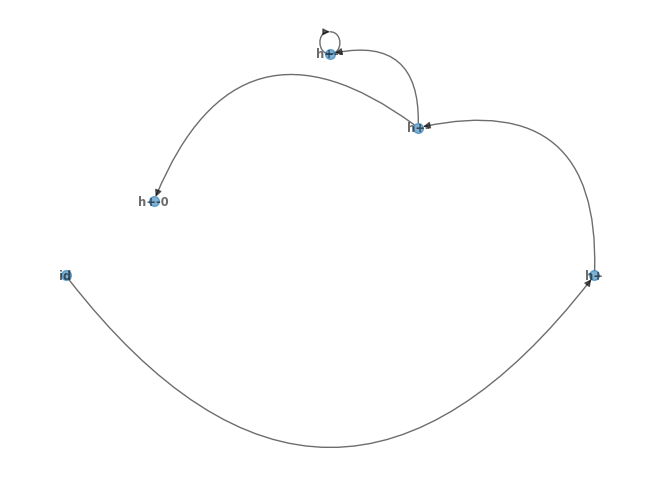

In [239]:

import pprint as pp

newG =nx.DiGraph(neighborgraph)


options = {
#     'width':1.0,
#     'node_color':'white',
    'alpha':0.572,
#     'edge_color':'white',
    'node_size':50,
    "connectionstyle":'arc3, rad=0.65',
    'with_labels':True,
    'font_size':'small',
    'font_color':'black',
    'font_weight':'bold'
}

pos = nx.planar_layout(newG) #planar_layout#spectral_layout#spring_layout
nx.draw(newG,pos,**options)


"has_dead_nbh=True ['h+-0']"
'has_dead_nbh=False []'


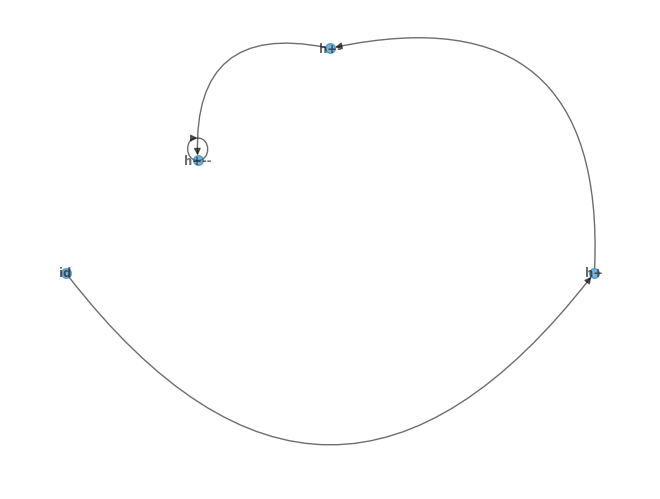

In [240]:

deadnodes = [node for node,degree in dict(newG.out_degree()).items() if degree == 0]
has_dead_nbh = len(deadnodes)>0
pp.pprint(f"{has_dead_nbh=} {deadnodes}")
while has_dead_nbh:
    newG.remove_nodes_from(deadnodes)
    deadnodes = [node for node,degree in dict(newG.out_degree()).items() if degree == 0]
    has_dead_nbh = len(deadnodes)>0
    pp.pprint(f"{has_dead_nbh=} {deadnodes}")
    

pos = nx.planar_layout(newG) #planar_layout#spectral_layout#spring_layout
nx.draw(newG,pos,**options)
